In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict

In [42]:
def get_titles(names):
    """ extract title (eg 'Mrs.') from full name """
    d = defaultdict(list)
    for name in names:
        ttl = name.split(', ')[1].removeprefix('the ').split()[0]
        d['Title'] += [ttl]
    return pd.DataFrame(data=d, index=names.index)

In [45]:
def proc_names(names):
    '''
    First extract title from name and assign passenger to
    class 'normal', 'service', or 'aristocrat'
    '''
    titles = get_titles(names)
    classes = dict(
    normal = ['Mr.', 'Mrs.', 'Ms.', 'Miss.', 'Master.', 'Mlle.', 'Mme.'],
    service = ['Dr.', 'Rev.', 'Major.', 'Col.', 'Capt.'],
    aristocrat = ['Countess.', 'Lady.', 'Sir.', 'Don.', 'Dona.', 'Jonkheer.'],
    )
    d = defaultdict(list)
    for i, ttl in enumerate(titles.Title):
        for k, v in classes.items():
            if ttl in v:
                d['Class'] += [k]
                break
    return pd.DataFrame(data=d, index=names.index)

In [3]:
def proc_tickets(tickets):
    """
    extract ticket tag from ticket reference
    eg 347082 -> 'None'
    eg STON/O2. 3101282 -> STON/O2.
    """
    d = defaultdict(list)
    for ticket in tickets:
        s = ticket.split()
        if len(s) == 1:
            d['TicketTag'] += ['nan']
        else:
            d['TicketTag'] += s[:1]
    return pd.DataFrame(data=d, index=tickets.index)

In [4]:
def proc_cabins(cabins):
    """ extract cabin tag and number of cabins from cabin """
    d = defaultdict(list)
    for cabin in cabins.values.astype(str):
        if cabin == 'nan':
            d['CabinTag'] += ['nan']
            d['NumCabins'] += [0]
            continue
        s = cabin.split()
        d['NumCabins'] += [len(s)]
        d['CabinTag'] += [s[0][0]]
    return pd.DataFrame(data=d, index=cabins.index)

In [7]:
# _MAPPINGS = defaultdict(lambda : ident, {
_MAPPINGS = defaultdict(lambda : lambda x:x, {
        ('Name', proc_names),
        ('Ticket', proc_tickets),
        ('Cabin', proc_cabins),
})

In [8]:
def proc_csv(f):
    df = pd.read_csv(f, index_col='PassengerId')
    features = pd.DataFrame(index = df.index)
    for col in df.columns:
        mapping = _MAPPINGS[col]
        features = features.join(mapping(df[col]))
    return features

In [9]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [37]:
pd.DataFrame(data=get_titles(df.Name)).value_counts()
# dft.value_counts()

Title    
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Mme.           1
Ms.            1
Capt.          1
Lady.          1
Jonkheer.      1
Don.           1
Countess.      1
Sir.           1
dtype: int64

In [33]:
classes = proc_names(df.Name)
classes.value_counts()

Class     
normal        868
service        18
aristocrat      5
dtype: int64

In [47]:
# pd.read_csv('test.csv', index_col='PassengerId')
# titles = get_titles(pd.read_csv('test.csv', index_col='PassengerId').Name)
# titles.value_counts()
proc_names(pd.read_csv('test.csv', index_col='PassengerId').Name).value_counts()

Class     
normal        412
service         5
aristocrat      1
dtype: int64

In [8]:
df_ = df.loc[6:8]
df_

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [9]:
proc_names(df_['Name'])

,Title
PassengerId,
6,Mr.
7,Mr.
8,Master.


In [10]:
dft = proc_names(df['Name'])
np.unique(dft.values)

array(['Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.',
       'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.',
       'Ms.', 'Rev.', 'Sir.'], dtype=object)

In [11]:
proc_cabins(df_['Cabin'])

,CabinTag,NumCabins
PassengerId,,
6,nan,0
7,E,1
8,nan,0


In [58]:
dfc = proc_cabins(df['Cabin'])
# dfc = 
dfc.join(df.Survived).drop('NumCabins', axis=1).value_counts()
# dfc['CabinTag'].hist()
# dfc.CabinTag.value_counts()

CabinTag  Survived
nan       0           481
          1           206
B         1            35
C         1            35
D         1            25
E         1            24
C         0            24
B         0            12
F         1             8
A         0             8
D         0             8
E         0             8
A         1             7
F         0             5
G         0             2
          1             2
T         0             1
dtype: int64

nan    327
C       35
B       18
D       13
E        9
F        8
A        7
G        1
Name: CabinTag, dtype: int64

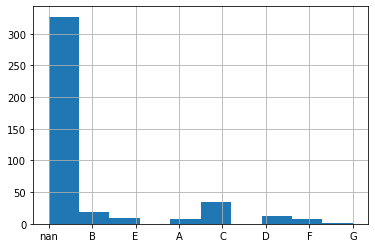

In [54]:
dfc = proc_cabins(pd.read_csv('test.csv', index_col='PassengerId')['Cabin'])
dfc['CabinTag'].hist()
dfc.CabinTag.value_counts()

In [59]:
features = proc_csv('train.csv')
features

TypeError: 'NoneType' object is not iterable

<AxesSubplot:>

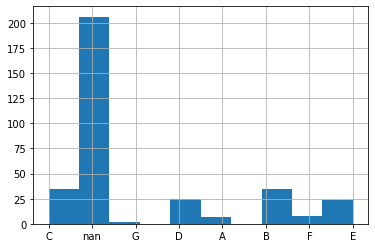

In [15]:
features['CabinTag'].loc[features.Survived==1].hist()

<AxesSubplot:>

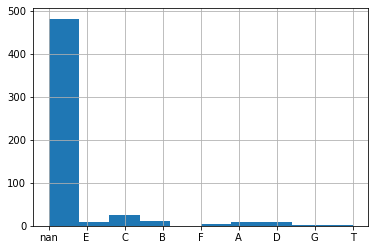

In [16]:
features['CabinTag'].loc[features.Survived==0].hist()

In [17]:
proc_cabins(df.Cabin)

,CabinTag,NumCabins
PassengerId,,
1,nan,0
2,C,1
3,nan,0
4,C,1
5,nan,0
...,...,...
887,nan,0
888,B,1
889,nan,0


In [18]:
proc_tickets(df.Ticket)

,TicketTag
PassengerId,
1,A/5
2,PC
3,STON/O2.
4,nan
5,nan
...,...
887,nan
888,nan
889,W./C.


In [19]:
proc_cabins(df.Cabin)

,CabinTag,NumCabins
PassengerId,,
1,nan,0
2,C,1
3,nan,0
4,C,1
5,nan,0
...,...,...
887,nan,0
888,B,1
889,nan,0


In [20]:
np.isnan(features.Age.values[888])

True